✅ Model Accuracy: 83.33%


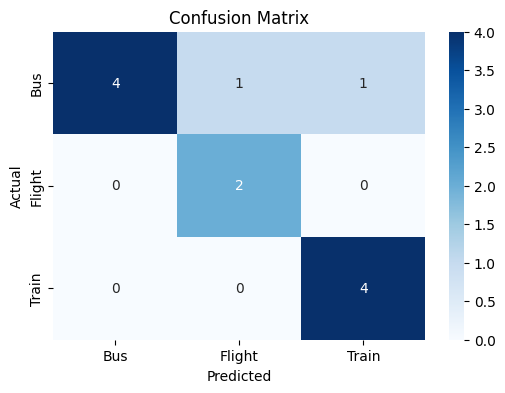

📊 Classification Report:
               precision    recall  f1-score   support

         Bus       1.00      0.67      0.80         6
      Flight       0.67      1.00      0.80         2
       Train       0.80      1.00      0.89         4

    accuracy                           0.83        12
   macro avg       0.82      0.89      0.83        12
weighted avg       0.88      0.83      0.83        12



In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("adjusted_travel_dataset.csv")

# Encode categorical features
budget_encoder = LabelEncoder()
mode_encoder = LabelEncoder()

df["BudgetEncoded"] = budget_encoder.fit_transform(df["Budget"])
df["ModeEncoded"] = mode_encoder.fit_transform(df["Mode"])

# Prepare training data
X = df[["Traveller", "BudgetEncoded"]].values
y = df["ModeEncoded"].values

# Split data for training/testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model with controlled depth
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = mode_encoder.classes_

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=labels))
 
